# Desafio Creditas - Data Science: Overview dos dados disponíveis

---

Visualização e entendimento dos dados disponíveis. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Visualização-do-Dataset" data-toc-modified-id="Visualização-do-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Visualização do Dataset</a></span><ul class="toc-item"><li><span><a href="#Descrição-das-variáveis" data-toc-modified-id="Descrição-das-variáveis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Descrição das variáveis</a></span></li><li><span><a href="#Identificação-de-Valores-Faltantes" data-toc-modified-id="Identificação-de-Valores-Faltantes-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Identificação de Valores Faltantes</a></span></li></ul></li></ul></div>

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Display options
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = None
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Load data and show loaded objects
%run scripts/load_data.py
%whos DataFrame

# Load datset description
description = pd.read_csv("data/description.csv")

Variable   Type         Data/Info
---------------------------------
raw_data   DataFrame                     id   age<...>[35021 rows x 32 columns]


## Visualização do Dataset

### Descrição das variáveis

Os tipos dos dados fornecidos são:

1. Valores Inteiros:
    - id;
    - dishonored_checks;
    - expired_debts;
    - banking_debts;
    - commercial_debts;
    - protests;

2. Valores Reais:
    - age;
    - monthly_income;
    - collateral_value;
    - loan_amount;
    - collateral_debt;
    - verified_restriction;
    - informed_restriction;
    - loan_term;
    - monthly_payment;
    - pre_approved;
    - form_completed;
    
3. Categóricos:
    - city;
    - state;
    - marital_status;
    - informed_purpose;
    - auto_brand;
    - auto_model;
    - auto_year;
    - channel;
    - zip_code;
    - landing_page;
    - landing_page_product;
    - gender;
    - utm_term;
    - education_level
    
4. Variável Alvo:
    - sent_to_analysis


In [8]:
description

,id,Chave única de uma solicitação de cliente
0,age,Idade do cliente
1,monthly_income,Renda mensal informada pelo cliente no momento...
2,collateral_value,Valor do automóvel que será dado em garantia
3,loan_amount,Valor solicitado pelo cliente para empréstimo
4,city,Cidade do cliente
5,state,Estado do cliente
6,collateral_debt,Valor que o automovel do cliente tem de dívida...
7,verified_restriction,Indica se o cliente possui alguma restrição/pe...
8,dishonored_checks,Indica se o cliente possui cheques sem fundo
9,expired_debts,Indica se o cliente possui dívidas vencidas


### Identificação de Valores Faltantes


In [21]:
pd.DataFrame(raw_data.isnull().sum(axis=0), columns=['#missing_values'])

,#missing_values
id,0
age,2
monthly_income,2
collateral_value,21
loan_amount,3
city,23
state,4
collateral_debt,10371
verified_restriction,8692
dishonored_checks,0


Algumas colunas posssuem uma quantidade elevada de valores nulos, quantidade comparável ao número de registros do conjunto de dados original. Esses valores deverão ser removidos.

Vamos adotar o critério que **qualquer variável que possua mais de 30% dos seus valores nulos serão excluídas do conjunto utilizado na modelagem**. Isso pode ser feito sem muito impacto devido disponibilidade de uma quantidade razoável informações neste problema. 

Variáveis a serem deletadas:
    - marital_status;
    - loan_term;
    - utm_term;
    - education_level;
    - landing_page_product

In [34]:
pd.DataFrame(1 - (raw_data.count() / raw_data['id'].count()), columns=['missing_data_rate'])

,missing_data_rate
id,0.000000
age,0.000057
monthly_income,0.000057
collateral_value,0.000600
loan_amount,0.000086
city,0.000657
state,0.000114
collateral_debt,0.296137
verified_restriction,0.248194
dishonored_checks,0.000000


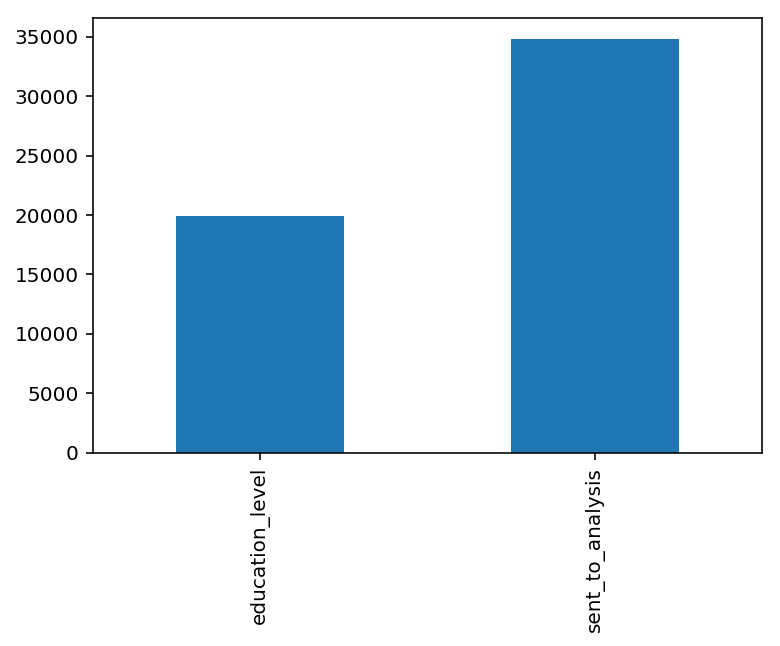